## Analysing fashion MNIST database

### Prepare data

In [36]:
#import os
#print(os.listdir("."))

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [64]:
data = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')
data.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
X = data.drop(columns=["label"]).values[:5000,:]
testX = test.drop(columns=["label"]).values
X.shape, X.dtype, type(X),X.ndim

((5000, 784), dtype('int64'), numpy.ndarray, 2)

In [77]:
y = data["label"].values[:5000].reshape(-1,1)
test_y = test["label"].values.reshape(-1,1)
y.shape, y.dtype, type(y),y.ndim,len(y)

((5000, 1), dtype('int64'), numpy.ndarray, 2, 5000)

In [68]:
#Labels
num_labels = 10

#Each training and test example is assigned to one of the following labels:
#0 T-shirt/top
#1 Trouser
#2 Pullover
#3 Dress
#4 Coat
#5 Sandal
#6 Shirt
#7 Sneaker
#8 Bag
#9 Ankle boot 

### Own algorithms

In [69]:
from mlspace import *

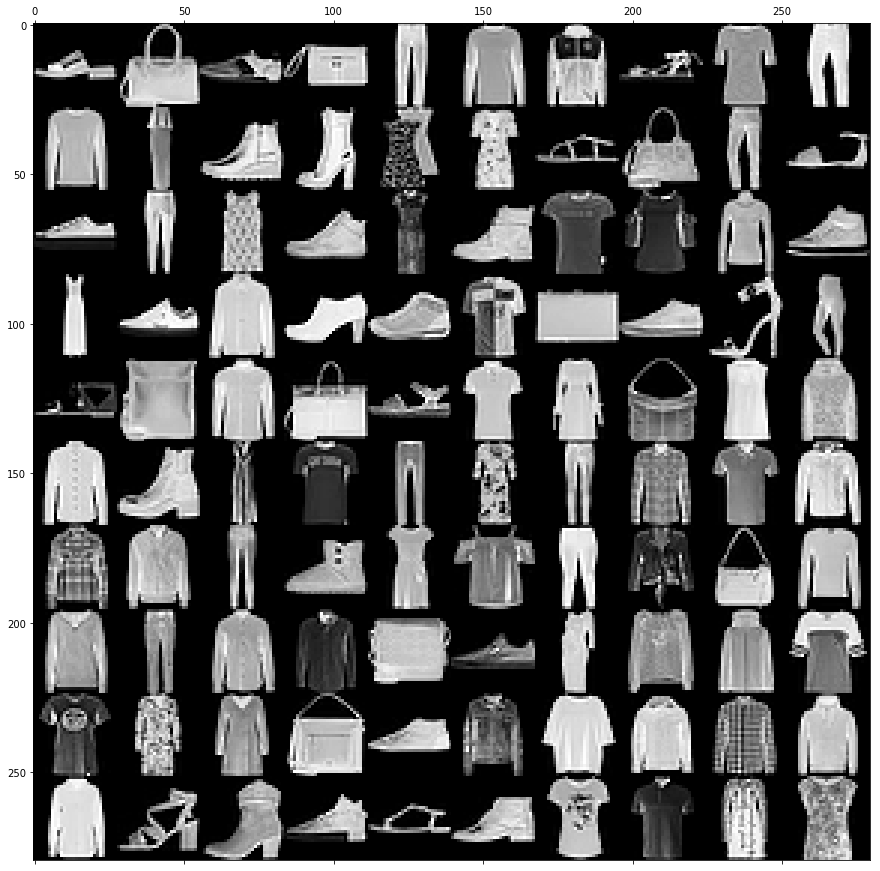

In [13]:
displayData(X)

In [83]:
X0 = (X-X.mean(axis=0))/(X.max(axis=0)-X.min(axis=0))
# uncomment the lines while learning the model ...
#l = 0.1
#all_theta = oneVsAll(X0, y, num_labels, l)

In [84]:
#np.savetxt("all_theta.txt",all_theta)
#all_theta.shape, all_theta.dtype, type(all_theta),all_theta.ndim,all_theta.T.shape
all_theta = np.loadtxt("all_theta.txt")

In [86]:
p = predictOneVsAll(all_theta, X0)
print('The training set accuracy is about {}%'.format(np.around(np.sum(p == y)/len(y)*100,decimals=1)))

The training set accuracy is about 94.7%


In [87]:
testX0 = (testX-testX.mean(axis=0))/(testX.max(axis=0)-testX.min(axis=0))
pt = predictOneVsAll(all_theta, testX0)
print('The testing set accuracy is about {}%'.format(np.around(np.sum(pt == test_y)/len(test_y)*100,decimals=1)))

The testing set accuracy is about 81.5%


### Scikit-learn

In [30]:
from sklearn import datasets, neighbors, linear_model
from sklearn import preprocessing

In [88]:
# sci-kit dataset
digits = datasets.load_digits()
X_digits = digits.data / digits.data.max()
y_digits = digits.target

n_samples = len(X_digits)

X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000,
                                           multi_class='multinomial')

print('length of X_digits is {}'.format(n_samples))
print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

length of X_digits is 1797
KNN score: 0.961111
LogisticRegression score: 0.933333


In [89]:
X_scaled = (X-X.mean(axis=0))/(X.max(axis=0)-X.min(axis=0))
testX_scaled = (testX-testX.mean(axis=0))/(testX.max(axis=0)-X.min(axis=0))

nn = neighbors.KNeighborsClassifier()
nn.fit(X_scaled, y.ravel())

lr = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000,
                                           multi_class='multinomial')
lr.fit(X_scaled, y.ravel())


NN score: 0.8099
LogisticRegression score: 0.8272


In [90]:
print('NN score for training set: {}'.format(nn.score(X_scaled,y.ravel())))
print('LogisticRegression score for training set: {}'.format(lr.score(X_scaled,y.ravel())))
print('NN score for testing set: {}'.format(nn.score(testX_scaled,test_y.ravel())))
print('LogisticRegression score for testing set: {}'.format(lr.score(testX_scaled,test_y.ravel())))

NN score for training set: 0.861
LogisticRegression score for training set: 0.958
NN score for testing set: 0.8099
LogisticRegression score for testing set: 0.8272


## The MNIST database of handwritten digits

In [19]:
import scipy.io as sio
#y[y == 0] = 10
#sio.savemat('fashionMNIST.mat', {'X':X0,'y':y})

#sio.whosmat("ex3data1.mat")
#sio.whosmat('all_theta_octave.mat')
#all_theta_octave = sio.loadmat('all_theta_octave.mat')['all_theta']
all_theta_octave

#mat = sio.loadmat("ex3data1.mat")
#mat_X=mat["X"]
#mat_y=mat["y"]
#mat_y[mat_y == 10] = 0

array([[ -7.82725709e+00,  -6.31381191e-04,   2.37057387e-04, ...,
         -9.37527398e-02,   2.58414217e-03,  -2.12804877e-02],
       [ -4.72295720e+00,  -3.35549800e-03,  -1.41798557e-03, ...,
          2.30245134e-01,   7.08773265e-02,   2.21797184e-02],
       [ -6.62574495e+00,   1.31734573e-02,   4.53432541e-03, ...,
         -4.39878049e-02,  -2.28612622e-02,   1.13425592e-02],
       ..., 
       [ -6.33179816e+00,  -1.61511757e-02,  -4.32920699e-03, ...,
         -3.11138979e-01,  -2.00361418e-01,  -7.63859543e-02],
       [ -7.83223614e+00,   1.21970377e-05,   7.28329711e-03, ...,
         -3.40913342e-02,   2.58281298e-02,   1.45468815e-02],
       [ -5.45761798e+00,  -6.91908722e-03,   5.98849012e-03, ...,
         -8.84223707e-02,  -1.93503174e-02,   1.42130663e-02]])

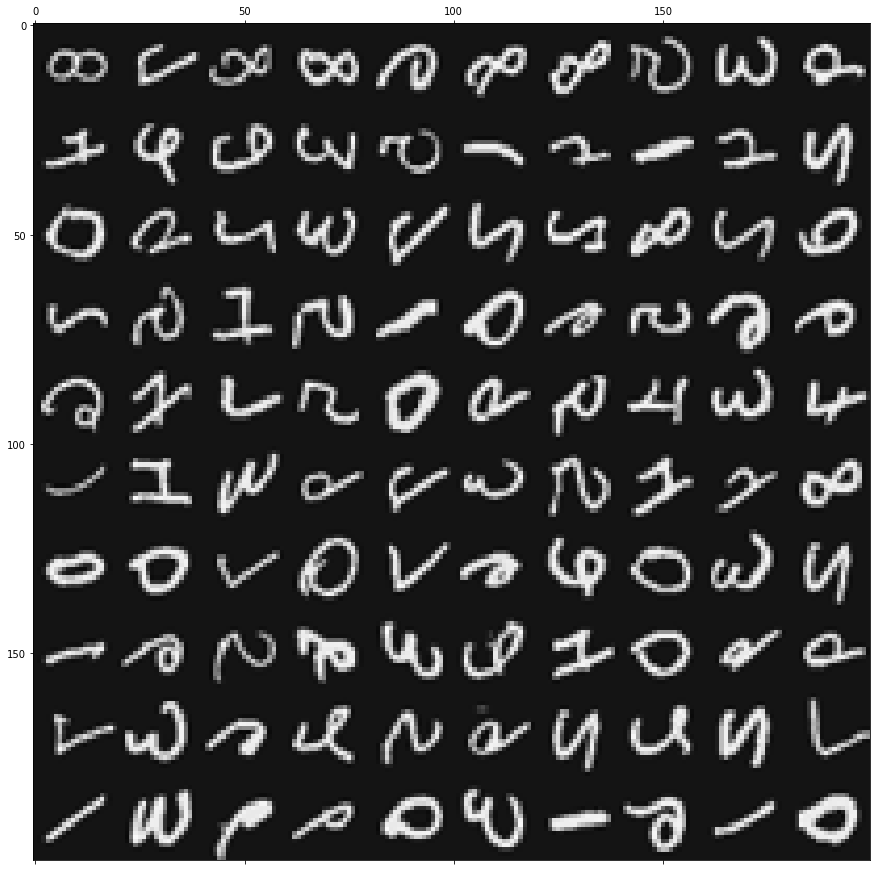

In [63]:
displayData(mat_X)

In [14]:
# while training uncomment this lines ...
#l = 0.1
#all_theta2 = oneVsAll(mat_X, mat_y, num_labels, l)

class 0
         Current function value: 0.011152
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
class 1
         Current function value: 0.015886
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
class 2
         Current function value: 0.057711
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
class 3
         Current function value: 0.063871
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
class 4
         Current function value: 0.039198
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
class 5
         Current function value: 0.062642
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
class 6
         Current function value: 0.023617
         Iterations: 100
         Function evaluations: 101
         Gradient ev

In [34]:
all_theta2[0,0]
# while training uncomment this line ...
#np.savetxt("all_theta2.txt",all_theta2)
all_theta2 = np.loadtxt("all_theta2.txt")

In [35]:
p2 = predictOneVsAll(all_theta2, mat_X)
print('The training set accuracy is about {}%'.format(np.around(np.sum(p2 == mat_y)/len(mat_y)*100,decimals=1)))

The training set accuracy is about 94.9%
